In [189]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from clevar.match import output_matched_catalog
from clevar.catalog import ClCatalog

In [190]:
inpath = "/sps/lsst/groups/clusters/cluster_comparison_project/after_matching/"
inpath1 = inpath + "cosmoDC2_amico.DC2.fzb.magy/DC2.masked_v0/proximity_matching/deltaz_0.05_matchradius_1.0mpc_pref_angular_proximity/"
inpath2 = inpath + "cosmoDC2_amico.cosmoDC2.fzb/magy_v0/proximity_matching/deltaz_0.05_matchradius_1.0mpc_pref_angular_proximity/"
outpath = "/sps/lsst/users/namourou/web/desc/cluster_comparison_project/amico.DC2.fzb/magy/amico.cosmoDC2.fzb.magy_vs_amico.DC2.fzb.magy"
#outpath1 = outpath + "amico.cosmoDC2.fzb/magy/"
#outpath2 = outpath + "amico.DC2.fzb/magy/"
#outpathvs = outpath + "amico.cosmoDC2.fzb.magy_vs_amico.DC2.fzb.magy/"

In [191]:
am_cdc = ClCatalog.read_full(inpath2 + "amico.cosmoDC2.fzb.magy.fits")
cdc = ClCatalog.read_full(inpath2 + "cosmoDC2.v0.fits")
am_dc = ClCatalog.read_full(inpath1 + "amico.DC2.fzb.magy.v0.fits")
dc = ClCatalog.read_full(inpath1 + "cosmoDC2.DC2.masked.fits")

    * ClEvar used in matching: 0.13.5
    * ClEvar used in matching: 0.13.5
    * ClEvar used in matching: 0.13.5
    * ClEvar used in matching: 0.13.5


## Number/Fraction of not_matched clusters

In [192]:
am_cdc_nm = am_cdc[[len(am_cdc['mt_multi_self'][i])<1 for i in range(len(am_cdc))]]
am_dc_nm = am_dc[[len(am_dc['mt_multi_self'][i])<1 for i in range(len(am_dc))]]
am_cdc_m = am_cdc[[len(am_cdc['mt_multi_self'][i])>0 for i in range(len(am_cdc))]]
am_dc_m = am_dc[[len(am_dc['mt_multi_self'][i])>0 for i in range(len(am_dc))]]

In [193]:
n_nm_cdc = len(am_cdc_nm)
n_nm_dc = len(am_dc_nm)
f_nm_cdc = round(len(am_cdc_nm)/len(am_cdc)*100,1)
f_nm_dc = round(len(am_dc_nm)/len(am_dc)*100,1)
print(f"Portion of clusters not matched in AMICO on CosmoDC2 is {f_nm_cdc}% (n = {n_nm_cdc})\nPortion of clusters not matched in AMICO on DC2 is {f_nm_dc}% (n = {n_nm_dc})")

Portion of clusters not matched in AMICO on CosmoDC2 is 15.8% (n = 26039)
Portion of clusters not matched in AMICO on DC2 is 13.6% (n = 10146)


In [194]:
z_bins = np.linspace(0,2,40)

## Unmatched AMICO vs cosmoDC2

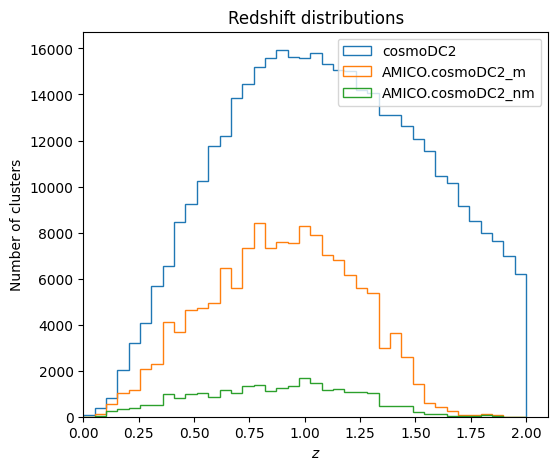

In [195]:
plt.figure(figsize = [6,5])
plt.hist(cdc["z_cl"], bins = z_bins, label = "cosmoDC2", histtype = "step")#, density = True)
plt.hist(am_cdc_m["z_cl"], bins = z_bins, label = "AMICO.cosmoDC2_m", histtype = "step")#, density = True)
plt.hist(am_cdc_nm["z_cl"], bins = z_bins, label = "AMICO.cosmoDC2_nm", histtype = "step")#, density = True)
plt.xlabel("$z$")
plt.title("Redshift distributions")
plt.ylabel("Number of clusters")
plt.xlim([0,2.1])
plt.legend()
#plt.savefig(outpath + "redshift_distributions_normalized.png", bbox_inches='tight')
plt.show()

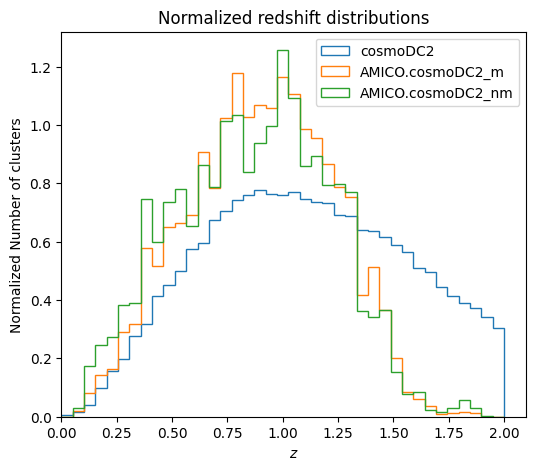

In [196]:
plt.figure(figsize = [6,5])
plt.hist(cdc["z_cl"], bins = z_bins, label = "cosmoDC2", histtype = "step", density = True)
plt.hist(am_cdc_m["z_cl"], bins = z_bins, label = "AMICO.cosmoDC2_m", histtype = "step", density = True)
plt.hist(am_cdc_nm["z_cl"], bins = z_bins, label = "AMICO.cosmoDC2_nm", histtype = "step", density = True)
plt.xlabel("$z$")
plt.title("Normalized redshift distributions")
plt.ylabel("Normalized Number of clusters")
plt.xlim([0,2.1])
plt.legend()
#plt.savefig(outpath + "redshift_distributions_normalized.png", bbox_inches='tight')
plt.show()

## Unmatched AMICO vs DC2

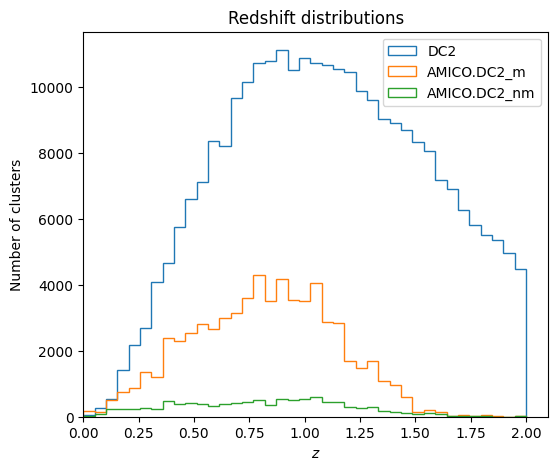

In [197]:
plt.figure(figsize = [6,5])
plt.hist(dc["z_cl"], bins = z_bins, label = "DC2", histtype = "step")#, density = True)
plt.hist(am_dc_m["z_cl"], bins = z_bins, label = "AMICO.DC2_m", histtype = "step")#, density = True)
plt.hist(am_dc_nm["z_cl"], bins = z_bins, label = "AMICO.DC2_nm", histtype = "step")#, density = True)
plt.xlabel("$z$")
plt.title("Redshift distributions")
plt.ylabel("Number of clusters")
plt.xlim([0,2.1])
plt.legend()
#plt.savefig(outpath + "redshift_distributions_normalized.png", bbox_inches='tight')
plt.show()

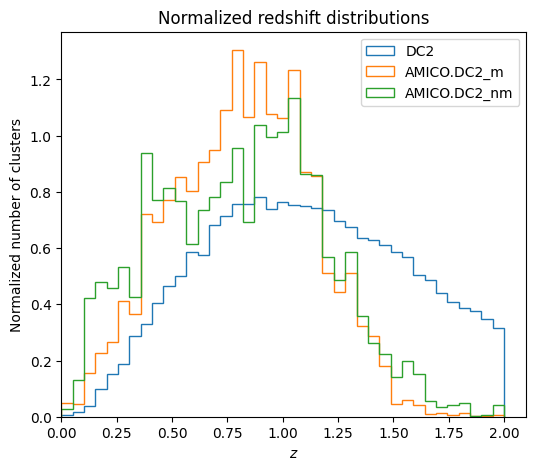

In [198]:
plt.figure(figsize = [6,5])
plt.hist(dc["z_cl"], bins = z_bins, label = "DC2", histtype = "step", density = True)
plt.hist(am_dc_m["z_cl"], bins = z_bins, label = "AMICO.DC2_m", histtype = "step", density = True)
plt.hist(am_dc_nm["z_cl"], bins = z_bins, label = "AMICO.DC2_nm", histtype = "step", density = True)
plt.xlabel("$z$")
plt.title("Normalized redshift distributions")
plt.ylabel("Normalized number of clusters")
plt.xlim([0,2.1])
plt.legend()
#plt.savefig(outpath + "redshift_distributions_normalized.png", bbox_inches='tight')
plt.show()

### CosmoDC2 unmatched vs DC2 unmatched

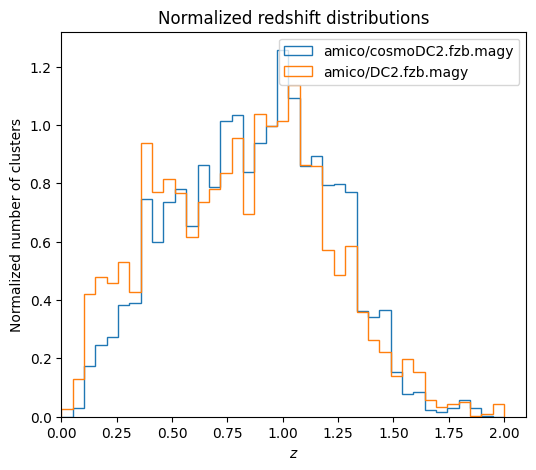

In [199]:
plt.figure(figsize = [6,5])
plt.hist(am_cdc_nm["z_cl"], bins = z_bins, label = "amico/cosmoDC2.fzb.magy", histtype = "step", density = True)
plt.hist(am_dc_nm["z_cl"], bins = z_bins, label = "amico/DC2.fzb.magy", histtype = "step", density = True)
plt.xlabel("$z$")
plt.title("Normalized redshift distributions")
plt.ylabel("Normalized number of clusters")
plt.xlim([0,2.1])
plt.legend()
#plt.savefig(outpath + "redshift_distributions_normalized.png", bbox_inches='tight')
plt.show()

## Positions of unmatched clusters

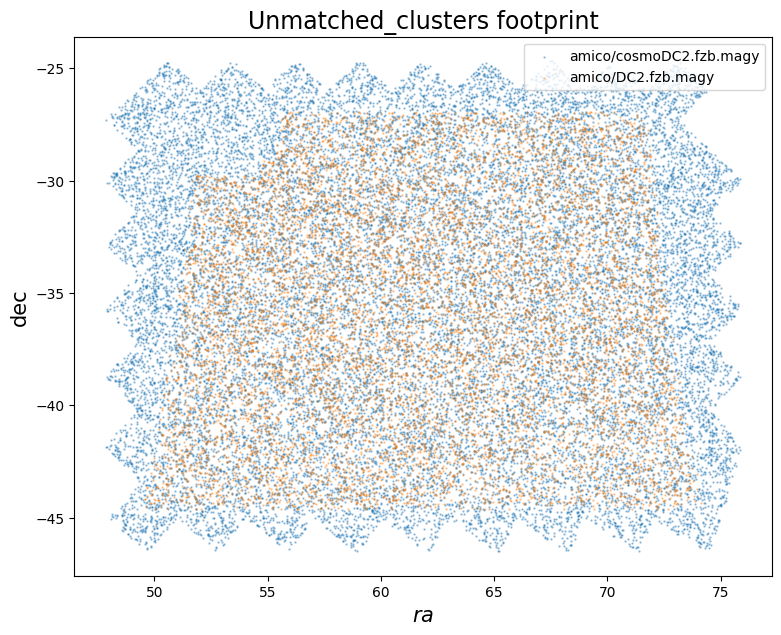

In [200]:
plt.figure(figsize = [9,7])
plt.scatter(am_cdc_nm["ra_cl"], am_cdc_nm["dec_cl"], alpha = .4, s=.5, label = "amico/cosmoDC2.fzb.magy")
plt.scatter(am_dc_nm["ra_cl"], am_dc_nm["dec_cl"], alpha = .4, s=.5, label = "amico/DC2.fzb.magy")
plt.xlabel("$ra$", fontsize = 15)
plt.title("Unmatched_clusters footprint", fontsize = 17)
plt.ylabel("dec", fontsize = 15)
#plt.ylim([0,250])
#plt.xlim([0,2])
plt.legend(loc = 'upper right')

## SN of unmatched clusters

In [201]:
snr_bins = np.linspace(0,10,41)

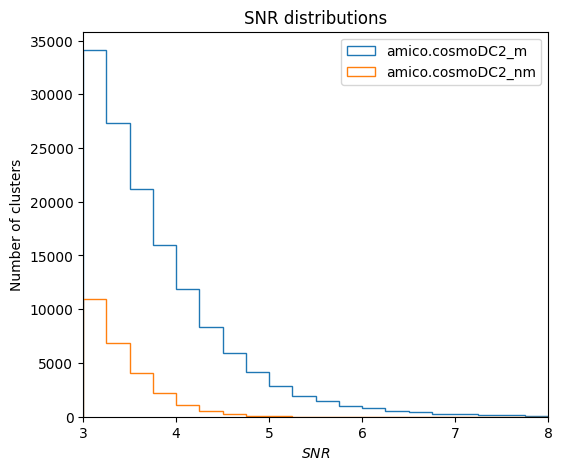

In [202]:
plt.figure(figsize = [6,5])
plt.hist(am_cdc_m["snr_cl"], bins = snr_bins, label = "amico.cosmoDC2_m", histtype = "step")#, density = True)
plt.hist(am_cdc_nm["snr_cl"], bins = snr_bins, label = "amico.cosmoDC2_nm", histtype = "step")#, density = True)
plt.xlabel("$SNR$")
plt.title("SNR distributions")
plt.ylabel("Number of clusters")
plt.xlim([3,8])
plt.legend()

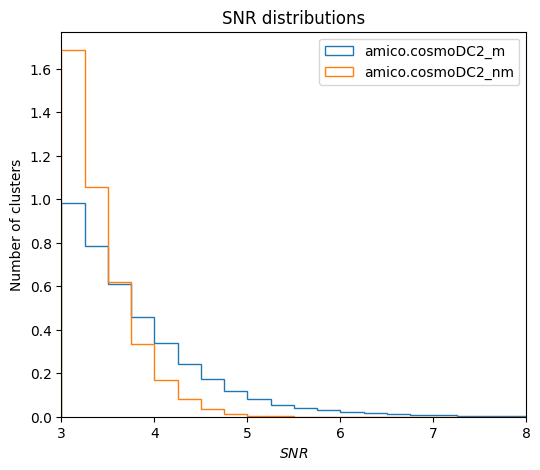

In [203]:
plt.figure(figsize = [6,5])
plt.hist(am_cdc_m["snr_cl"], bins = snr_bins, label = "amico.cosmoDC2_m", histtype = "step", density = True)
plt.hist(am_cdc_nm["snr_cl"], bins = snr_bins, label = "amico.cosmoDC2_nm", histtype = "step", density = True)
plt.xlabel("$SNR$")
plt.title("SNR distributions")
plt.ylabel("Number of clusters")
plt.xlim([3,8])
plt.legend()

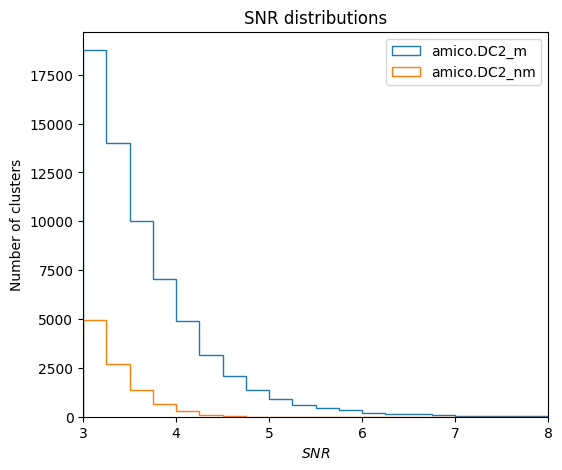

In [204]:
plt.figure(figsize = [6,5])
plt.hist(am_dc_m["snr_cl"], bins = snr_bins, label = "amico.DC2_m", histtype = "step")#, density = True)
plt.hist(am_dc_nm["snr_cl"], bins = snr_bins, label = "amico.DC2_nm", histtype = "step")#, density = True)
plt.xlabel("$SNR$")
plt.title("SNR distributions")
plt.ylabel("Number of clusters")
plt.xlim([3,8])
plt.legend()

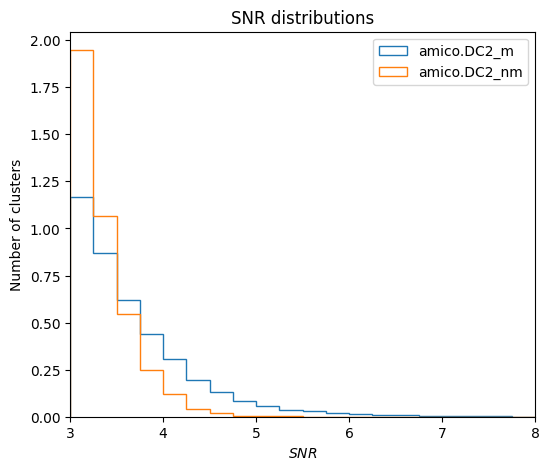

In [205]:
plt.figure(figsize = [6,5])
plt.hist(am_dc_m["snr_cl"], bins = snr_bins, label = "amico.DC2_m", histtype = "step", density = True)
plt.hist(am_dc_nm["snr_cl"], bins = snr_bins, label = "amico.DC2_nm", histtype = "step", density = True)
plt.xlabel("$SNR$")
plt.title("SNR distributions")
plt.ylabel("Number of clusters")
plt.xlim([3,8])
plt.legend()

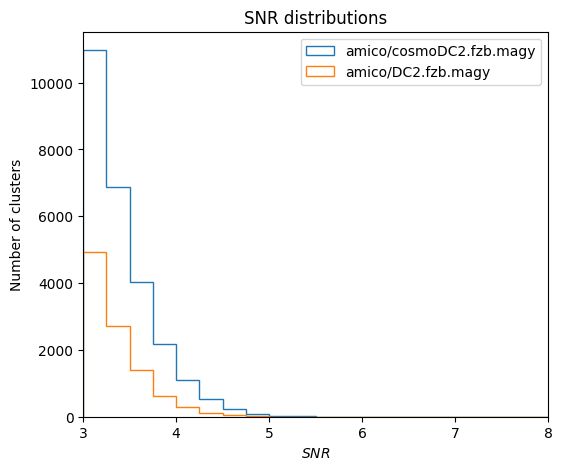

In [206]:
plt.figure(figsize = [6,5])
plt.hist(am_cdc_nm["snr_cl"], bins = snr_bins, label = "amico/cosmoDC2.fzb.magy", histtype = "step")#, density = True)
plt.hist(am_dc_nm["snr_cl"], bins = snr_bins, label = "amico/DC2.fzb.magy", histtype = "step")#, density = True)
plt.xlabel("$SNR$")
plt.title("SNR distributions")
plt.ylabel("Number of clusters")
plt.xlim([3,8])
plt.legend()

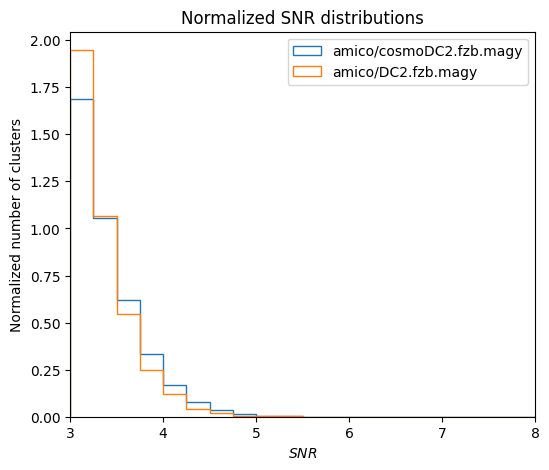

In [207]:
plt.figure(figsize = [6,5])
plt.hist(am_cdc_nm["snr_cl"], bins = snr_bins, label = "amico/cosmoDC2.fzb.magy", histtype = "step", density = True)
plt.hist(am_dc_nm["snr_cl"], bins = snr_bins, label = "amico/DC2.fzb.magy", histtype = "step", density = True)
plt.xlabel("$SNR$")
plt.title("Normalized SNR distributions")
plt.ylabel("Normalized number of clusters")
plt.xlim([3,8])
plt.legend()

## Fraction of unmatched clusters vs SNR

In [208]:
snr_bins = np.linspace(0,10,21)

(3.0, 10.0)

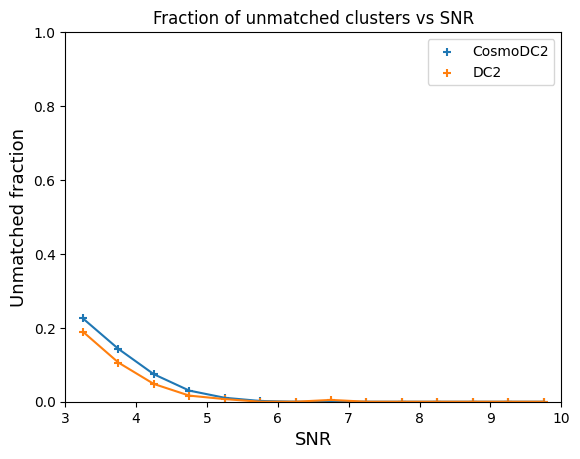

In [209]:
nbins_x = len(snr_bins)-1
nm_cdc = np.empty(nbins_x)
nm_dc = np.empty(nbins_x)

bin_x = np.empty(nbins_x)
x_bins = snr_bins

for ix in range(nbins_x):
     bin_x[ix] = 0.5 * (x_bins[ix] + x_bins[ix+1])

for i in range(nbins_x):
    cut1 = x_bins[i]
    cut2 = x_bins[i+1]
    filter1 = np.logical_and(am_cdc_nm.data['snr_cl'] >= cut1, am_cdc_nm.data['snr_cl'] <= cut2)
    c_clusters_nmatched = am_cdc_nm[filter1]
    filter2 = np.logical_and(am_cdc['snr_cl'] >= cut1, am_cdc['snr_cl'] <= cut2)
    c_clusters = am_cdc[filter2]
    if len(c_clusters)!=0:
        nm_cdc[i] = len(c_clusters_nmatched)/len(c_clusters)
    else :
        nm_cdc[i] = None
    
    filter3 = np.logical_and(am_dc_nm.data['snr_cl'] >= cut1, am_dc_nm.data['snr_cl'] <= cut2)
    c_clusters_nmatched2 = am_dc_nm[filter3]
    filter4 = np.logical_and(am_dc['snr_cl'] >= cut1, am_dc['snr_cl'] <= cut2)
    c_clusters2 = am_dc[filter4]
    if len(c_clusters2)!=0:
        nm_dc[i] = len(c_clusters_nmatched2)/len(c_clusters2)
    else :
        nm_dc[i] = None
    

plt.scatter(bin_x, nm_cdc, label="CosmoDC2", marker= "+", s=30)
plt.plot(bin_x, nm_cdc)
plt.scatter(bin_x, nm_dc, label="DC2", marker= "+", s=30)
plt.plot(bin_x, nm_dc)
plt.xlabel('SNR', fontsize = 13)
plt.ylabel('Unmatched fraction', fontsize = 13)
plt.title("Fraction of unmatched clusters vs SNR")
plt.legend()
plt.ylim(0,1)
plt.xlim(3,10) 

In [210]:
mass_bins = np.linspace(0,100,50)

(0.0, 80.0)

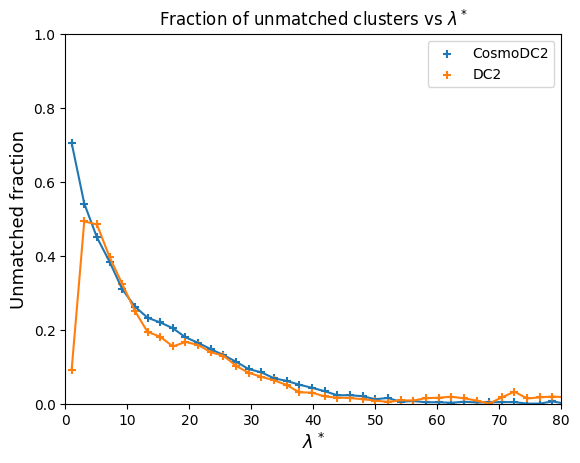

In [211]:
nbins_x = len(mass_bins)-1
nm_cdc = np.empty(nbins_x)
nm_dc = np.empty(nbins_x)

bin_x = np.empty(nbins_x)
x_bins = mass_bins

for ix in range(nbins_x):
     bin_x[ix] = 0.5 * (x_bins[ix] + x_bins[ix+1])

for i in range(nbins_x):
    cut1 = x_bins[i]
    cut2 = x_bins[i+1]
    filter1 = np.logical_and(am_cdc_nm.data['mass'] >= cut1, am_cdc_nm.data['mass'] <= cut2)
    c_clusters_nmatched = am_cdc_nm[filter1]
    filter2 = np.logical_and(am_cdc['mass'] >= cut1, am_cdc['mass'] <= cut2)
    c_clusters = am_cdc[filter2]
    if len(c_clusters)!=0:
        nm_cdc[i] = len(c_clusters_nmatched)/len(c_clusters)
    else :
        nm_cdc[i] = None
    
    filter3 = np.logical_and(am_dc_nm.data['mass'] >= cut1, am_dc_nm.data['mass'] <= cut2)
    c_clusters_nmatched2 = am_dc_nm[filter3]
    filter4 = np.logical_and(am_dc['mass'] >= cut1, am_dc['mass'] <= cut2)
    c_clusters2 = am_dc[filter4]
    if len(c_clusters2)!=0:
        nm_dc[i] = len(c_clusters_nmatched2)/len(c_clusters2)
    else :
        nm_dc[i] = None
    

plt.scatter(bin_x, nm_cdc, label="CosmoDC2", marker= "+", s=30)
plt.plot(bin_x, nm_cdc)
plt.scatter(bin_x, nm_dc, label="DC2", marker= "+", s=30)
plt.plot(bin_x, nm_dc)
plt.xlabel('$\lambda^*$', fontsize = 13)
plt.ylabel('Unmatched fraction', fontsize = 13)
plt.title("Fraction of unmatched clusters vs $\lambda^*$")
plt.legend()
plt.ylim(0,1)
plt.xlim(0,80) 